In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

n = 1000
p = 200

theta = np.random.randn(p,n)
y = np.random.randn(p)

def l1_norm(x):
    return np.linalg.norm(x,ord=1)

# Sparse Solution: min||s|| s.t y = theta * s
constr = ({'type': 'eq', 'fun': lambda x: theta @ x - y})
x0 = np.linalg.pinv(theta) @ y
res = minimize(l1_norm, x0, method='SLSQP', constraints=constr)
s_L1 = res.x

In [3]:
# Least Squares Solution: s = inv(theta) * y
s_L2 = np.linalg.pinv(theta) @ y

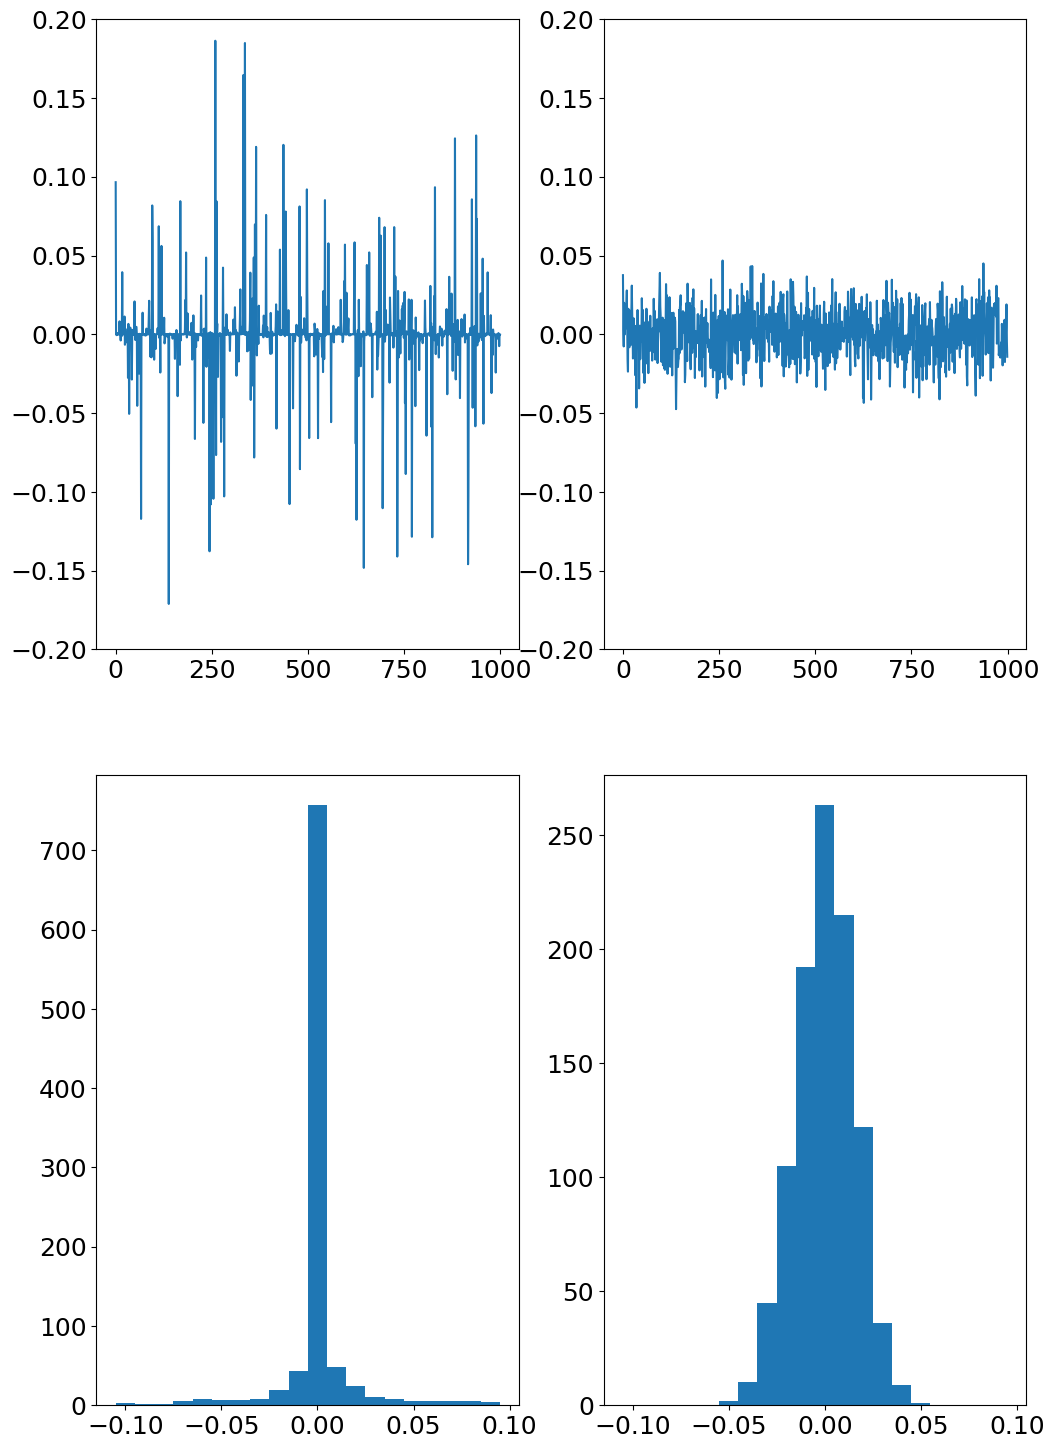

In [8]:
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1)
axs[0].set_ylim(-0.2, 0.2)
axs[1].plot(s_L2)
axs[1].set_ylim(-0.2, 0.2)
axs[2].hist(s_L1, bins=np.arange(-0.105, 0.105, 0.01))
axs[3].hist(s_L2, bins=np.arange(-0.105, 0.105, 0.01))

plt.show()